# Домашнее задание №3

<span style="color: red; font-size: 14pt">Дедлайн: 20 марта 23:59</span>

Машинное обучение, ФИВТ, Весна 2018

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall <номер_группы> <фамилия>``, к примеру -- ``ML2018_fall 596 ivanov``
- Выполненное дз сохраните в файл ``ML2018_<фамилия>_<группа>_task<номер задания>.ipnb``, к примеру -- ``ML2018_ivanov_596_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com`` (или в телеграм-канал)
- Укажите тему письма в следующем формате ``ML2018_fall Question <Содержание вопроса>``

--------
- **PS1**: Используются автоматические фильтры, мы не найдем ваше дз, если вы укажете тему письма в неправильном формате.
- **PS2**: Просроченный дедлайн снижает максимальный вес задания по формуле, указнной на первом семинаре

## Часть 1. Теоретические задачи

##### 30% баллов за задание, оценочное время выполнения 30 минут

### Задача 1 (10% баллов)

Предположим, что мы решаем задачу бинарной классификации и что у нас есть три алгоритма $b_1(x)$, $b_2(x)$ и $b_3(x)$, каждый из которых ошибается с вероятностью p. Мы строим композицию взвешенным голосованием: алгоритмам присвоены значимости $w_1$, $w_2$ и $w_3$, и для вынесения вердикта суммируются значимости алгоритмов, проголосовавших за каждый из классов:

$$a_0 = \sum_{i=1}^3 w_i [b_i(x)=0]$$
$$a_1 = \sum_{i=1}^3 w_i [b_i(x)=1]$$


Объект $x$ относится к классу, для которого такая сумма оказалась максимальной. Например, если первые два алгоритма голосуют за класс $0$, а третий — за класс $1$, то выбирается класс $0$, если $w_1 + w_2 > w_3$, и класс $1$ в противном случае. Какова вероятность ошибки такой композиции этих трех алгоритмов, если:
1. $w_1 = 0.2, w_2 = 0.3, w_3 = 0.2$;
2. $w_1 = 0.2, w_2 = 0.5, w_3 = 0.2$? 

**Случай 1**

Заметим, что алгоритм выдаст ошибку тогда и только тогда когда ошибаются как минимум два классификатора. Тогда
$P_{error} = 3p^2(1-p) + p^3 = p^2(3 - 3p + p) = p^2(3-2p)$

**Случай 2**

Ошибка второго классификатора всегда приводит к ошибке алгоритма. Соответственно $P_{error} = p$

### Задача 2 (10% баллов)

Рассмотрим задачу бинарной классификации. Будем считать, что все алгоритмы из базового семейства возвращают ответы из отрезка $[0,1]$, которые можно интерпретировать как вероятности принадлежности объектов классу $1$. В качестве функции потерь возьмем отрицательный логарифм правдоподобия:
$$L(y,z) = -(y \log{z}+(1-y)\log{(1-z)})$$
В формуле $y$ - правильный ответ, $z$ - ответ алгоритма. Выпишите формулы для поиска базовых алгоритмов $b_n$ и коэффициентов $\gamma_n$ в градиентном бустинге.

$\sum_{i=1}^{N} L(y_i, f_m(x_i) + \gamma_m b_m(x_i)) \rightarrow min$

$s_i = - \frac{\delta L}{\delta f_m} |_{x_i} =  \frac{\delta }{\delta f_m} (y \ln(f_m(x) + \gamma_m b_m(x))+(1-y)\ln(1-f_m(x) - \gamma_m b_m(x))) |_{x_i} =  \frac{y_i}{f_m(x_i) + \gamma_m b_m(x_i)} - \frac{1 - y_i}{1-f_m(x_i) - \gamma_m b_m(x_i)} $

Вектор $\overline{s}$ задает направлеие антиградиента $L$ в точке $\overline{x}$. Тогда положим 

$b_{m+1} = argmin_{b} \sum_{i=1}^{N} (b(x_i) - s_i)^2$

$b_{m+1}(x_i) =  s_i \rightarrow b_{m+1} = \overline{s}$

$\gamma_{m+1} = argmin_{\gamma} \sum_{i=1}^{N} L(y_i, f_m(x_i) + \gamma b_{m+1}(x_i))$

$\frac{\delta}{\delta \gamma} \sum_{i=1}^{N} L(y_i, f_m(x_i) + \gamma b_{m+1}(x_i)) = -\sum_{i=1}^{N}(\frac{y_i b_{m+1}(x_i)}{f_m(x_i) + \gamma b_{m+1}(x_i)} - \frac{(1 - y_i) b_{m+1}(x_i)}{1 - f_m(x_i) - \gamma b_{m+1}(x_i)}) = 0$

### Задача 3 (10% баллов)

Известно, что на $n$-й итерации двухклассового метода AdaBoost
был выбран базовый классификатор, допускающий ошибку только на одном объекте $x_j$. Найдите нормированный вес $w_j^{(n+1)}$ при этом объекте на следующей итерации.

На n итерации

$W^{(n)} = \sum_{i=1}^N w_i^{(n)} = 1$

$err_{n} = \frac{\sum_{i=1}^N w_i^{(n)} * I(y_i != G_n(x_i)}{W^{(n)}} = w_j^{(n)}$

$\alpha_n = \ln(\frac{1 - err_n}{err_n}) = \ln(\frac{1 - w_j^{(n)}}{w_j^{(n)}})$

$w_j^{(n + 1)'} = w_j^{(n)} * \frac{1 - w_j^{(n)}}{w_j^{(n)}} = 1 - w_j^{n}$

Суммарный вес тогда $W^{(n)'} = 1 - w_j^{n} + 1  - w_j^{(n)} = 2  - 2w_j^{(n)}$

$ w_j^{(n + 1)} = \frac{w_j^{(n + 1)'}}{W^{(n)'}} = \frac{1 - w_j^{n}}{2  - 2w_j^{(n)}} = \frac{1}{2}$

## Часть 2. Random Forest

##### 70% баллов за задание, оценочное время выполнения 3 часа

### Реализация (40%)

**Необходимо реализовать класс `RandomForest`** (для решения задачи классификации)

**Спецификация:**
- класс наследуется от `sklearn.BaseEstimator`;
- конструктор содержит следующие параметры: 
    - `num_trees` - количество деревьев в лесе;
    - `max_depth` - максимальная глубина дерева (по умолчанию - `numpy.inf`); 
    - `max_features` - количество признаков, принимаемое к рассмотрению при разбиении (аналогичный параметр есть в sklearn имплементации). Параметр может принимать значения:
        - int - тогда рассматриваем max_features признаков при каждом разбиении;
        - float - max_features обозначает процент, int(max_features * n_features) признаков рассматривается при каждом разбиении;
        - “sqrt” - max_features=sqrt(n_features);
        - “log2” - max_features=log2(n_features);
        - None - max_features=n_features;
    - `criterion` - критерий разбиения (для классификации - 'gini' или 'entropy', по умолчанию - 'gini'); функции с подсчетом энтропийного и критерия Джини можно взять из предыдущего дз;
    
- класс имеет методы `fit` и `predict`;
- метод `fit` принимает матрицу объектов `X` и вектор ответов `y` (объекты `numpy.ndarray`) и возвращает экземпляр класса
    `RandomForest`, представляющий собой Random Forest, обученный по выборке `(X, y)` с учётом заданных в конструкторе параметров; 
- метод `predict` принимает матрицу объектов и возвращает вектор предсказанных ответов;

In [1]:
from IPython.display import Image
import warnings
warnings.simplefilter("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.datasets import load_digits as load
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from matplotlib import pyplot as plt
import IPython.display
from io import StringIO 
import pydotplus
import urllib
from sklearn import metrics, neighbors, dummy, preprocessing, svm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from IPython.display import Image
import PIL

/home/dmitry/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def bagging(X, y, size):
    indices = np.random.randint(0, len(X), (size, len(X)))
    sample_X, sample_y = X[indices], y[indices]
    return sample_X, sample_y

In [3]:
class RandomForest(sklearn.base.BaseEstimator, sklearn.base.ClassifierMixin):
    def __init__(self, num_trees, max_depth=None, max_features=None, criterion='gini', fixedFeatures=False):
        self.num_trees = num_trees
        self.max_depth = max_depth
        self.max_features = max_features
        self.trees = []
        self.criterion = criterion
        self.fixedFeatures = fixedFeatures
        
    def _createTree(self, x_sample, y_sample):
        if(self.fixedFeatures == False):
            model = tree.DecisionTreeClassifier(max_depth=self.max_depth,
                                                max_features=self.max_features,
                                                criterion=self.criterion)
            model.fit(x_sample, y_sample)
            return model
        else: 
            size = self._getSize(X_train.shape[0])
            x_train, y_train = self._removeFeatures(size, x_sample, y_sample)
            model = tree.DecisionTreeClassifier(max_depth=self.max_depth,
                                                criterion=self.criterion)
            model.fit(x_train, y_train)
            return model
        
    def _getAnswer(self, x):
        verdicts = []
        for i in range(self.num_trees):
            verdicts.append(self.trees[i].predict(x.reshape((1,x.shape[0]))))
        verdicts = np.array(verdicts).reshape((self.num_trees))
        return np.bincount(verdicts).argmax()
    
    def _getSize(self, num_features):
        if self.max_features == None:
            return num_features
        if self.max_features == 'log2':
            return int(round(np.log2(num_features)))
        if self.max_features == 'sqrt':
            return int(round(np.sqrt(num_features)))
        if isinstance(self.max_features, int):
            assert(self.max_features <= num_features)
            return self.max_features
        if isinstance(self.max_features, float):
            assert(0 < self.max_features <= 1)
            return int(round(self.max_features * num_features))
        
    def _removeFeatures(self, size, X_train, y_train):
            x_inner = np.copy(X_train)
            y_inner = np.copy(y_train)
            indices = np.random.choice(np.arange(X_train.shape[1]), size=size, replace=False)
            for i in range(X_train.shape[1]):
                if i not in indices:
                    x_inner.T[i] = -1
            return x_inner, y_inner
    
    def fit(self, X_train, y_train):
        X_samples, y_samples = bagging(X_train, y_train, self.num_trees)
        for i in range(self.num_trees):
            self.trees.append(self._createTree(X_samples[i], y_samples[i]))
        return self
    
    def predict(self, X_test):
        y_pred = []
        for i in range(X_test.shape[0]):
            y_pred.append(self._getAnswer(X_test[i]))
        return np.array(y_pred)

### Тестирование (15%)

Загрузите датасет Wine Data Set (https://archive.ics.uci.edu/ml/datasets/wine). Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Попробуйте обучить Random Forest на предложенном датасете

In [4]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
columns = 'class Alcohol Malic_acid Ash Alcalinity_of_ash Magnesium Total_phenols'
columns += ' Flavanoids Nonflavanoid_phenols Proanthocyanins Color_intensity'
columns += ' Hue OD280_OD315_of_diluted_wines Proline'
df.columns = columns.split()


In [5]:
X_features = columns.split()[1::1]
y = np.array(df['class'])
X = np.array(df[X_features])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

Покажите, как менялись значения критерия качества `accuracy` при увеличении параметра num_trees. Видны ли следы переобучения?

In [6]:
%%time
numTrees = np.arange(1,200,5)
scores_test = []
scores_train = []
scores_lib = []
for num in numTrees:
    model = RandomForest(num_trees=num, max_features='log2')
    lib_model = RandomForestClassifier(n_estimators=num, max_features='log2')
    lib_model.fit(X_train, y_train)
    model.fit(X_train, y_train)
    scores_test.append(accuracy_score(y_test, model.predict(X_test)))
    scores_train.append(accuracy_score(y_train, model.predict(X_train)))
    scores_lib.append(accuracy_score(y_test, lib_model.predict(X_test)))

CPU times: user 1min 18s, sys: 813 ms, total: 1min 19s
Wall time: 1min 19s


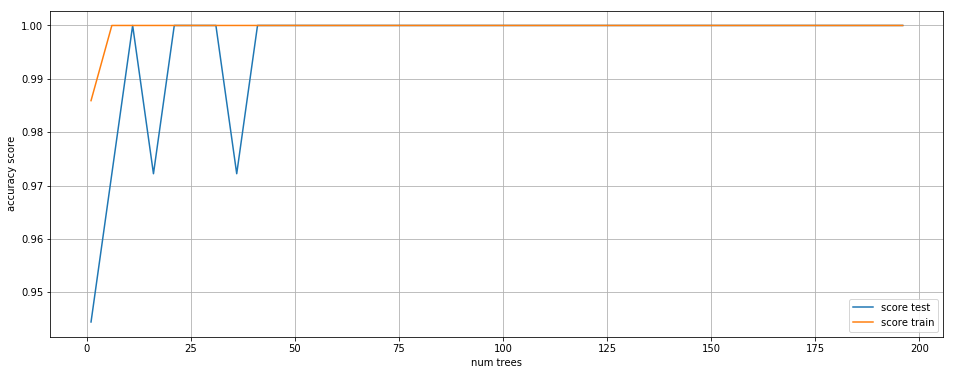

In [7]:
plt.figure(figsize=(16,6))
plt.plot(numTrees, scores_test, label='score test')
plt.plot(numTrees, scores_train, label='score train')
plt.xlabel('num trees')
plt.ylabel('accuracy score')
plt.legend()
plt.grid(True)
plt.show()

Сравните качество работы вашей реализации RandomForest и реализации из sklearn.

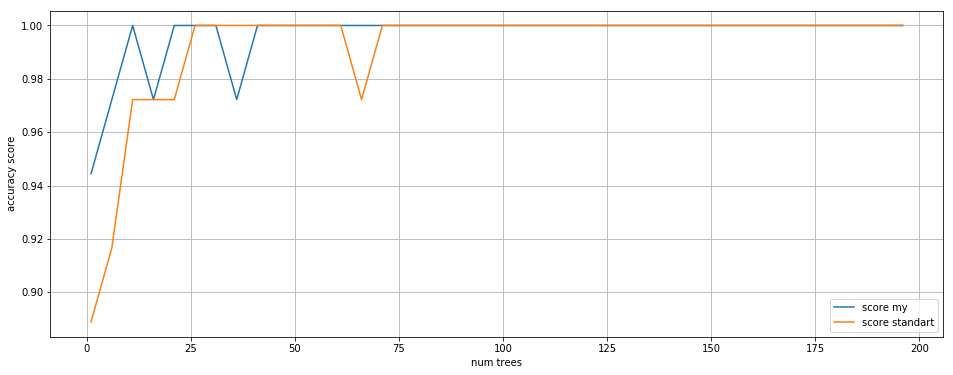

In [8]:
plt.figure(figsize=(16,6))
plt.plot(numTrees, scores_test, label='score my')
plt.plot(numTrees, scores_lib, label='score standart')
plt.xlabel('num trees')
plt.ylabel('accuracy score')
plt.legend()
plt.grid(True)
plt.show()

**Вывод**

Реализация на данном датасете работают примерно одинаково. Следов переобучения нет.

### Модификация Random Forest (15%)

Измените свою реализацию `RandomForest` так, чтобы случайное подмножество признаков выбиралось не в каждом сплите, а перед построением всего дерева. Сравните результат работы с обычным RandomForest.

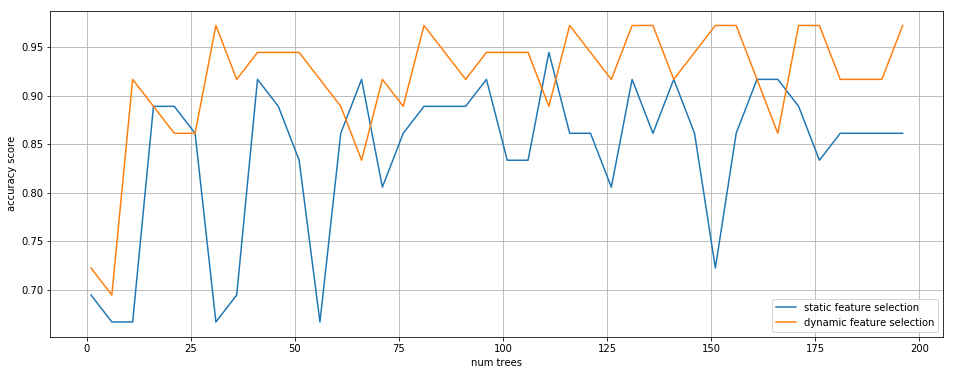

CPU times: user 31.9 s, sys: 0 ns, total: 31.9 s
Wall time: 31.9 s


In [13]:
%%time
numTrees = np.arange(1,200,5)
max_depth = 1
scores_static = []
scores_dynamic = []
for num in numTrees:
    model_d = RandomForest(num_trees=num, max_depth=max_depth, max_features='sqrt')
    model_s = RandomForest(num_trees=num, max_depth=max_depth, max_features='sqrt', fixedFeatures=True)
    model_d.fit(X_train, y_train)
    model_s.fit(X_train, y_train)
    scores_static.append(accuracy_score(y_test, model_s.predict(X_test)))
    scores_dynamic.append(accuracy_score(y_test, model_d.predict(X_test)))
plt.figure(figsize=(16,6))
plt.plot(numTrees, scores_static, label='static feature selection')
plt.plot(numTrees, scores_dynamic, label='dynamic feature selection')
plt.xlabel('num trees')
plt.ylabel('accuracy score')
plt.legend()
plt.grid(True)
plt.show()

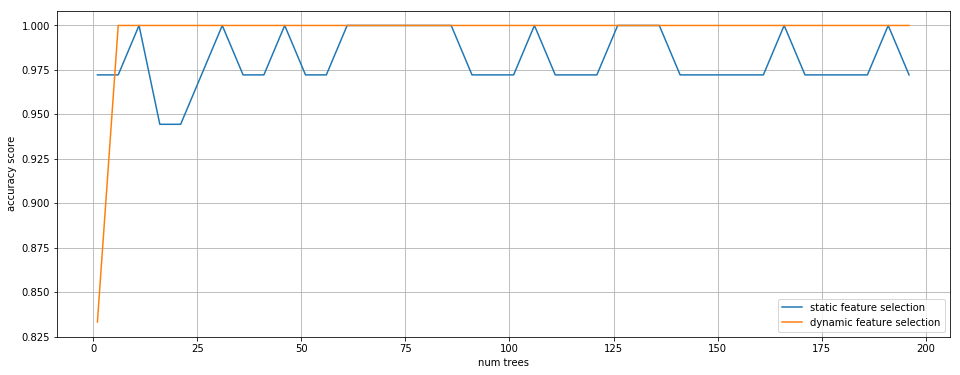

CPU times: user 35.1 s, sys: 184 ms, total: 35.3 s
Wall time: 35.2 s


In [10]:
%%time
numTrees = np.arange(1,200,5)
max_depth = 5
scores_static = []
scores_dynamic = []
for num in numTrees:
    model_d = RandomForest(num_trees=num, max_depth=max_depth, max_features='sqrt')
    model_s = RandomForest(num_trees=num, max_depth=max_depth, max_features='sqrt', fixedFeatures=True)
    model_d.fit(X_train, y_train)
    model_s.fit(X_train, y_train)
    scores_static.append(accuracy_score(y_test, model_s.predict(X_test)))
    scores_dynamic.append(accuracy_score(y_test, model_d.predict(X_test)))
plt.figure(figsize=(16,6))
plt.plot(numTrees, scores_static, label='static feature selection')
plt.plot(numTrees, scores_dynamic, label='dynamic feature selection')
plt.xlabel('num trees')
plt.ylabel('accuracy score')
plt.legend()
plt.grid(True)
plt.show()

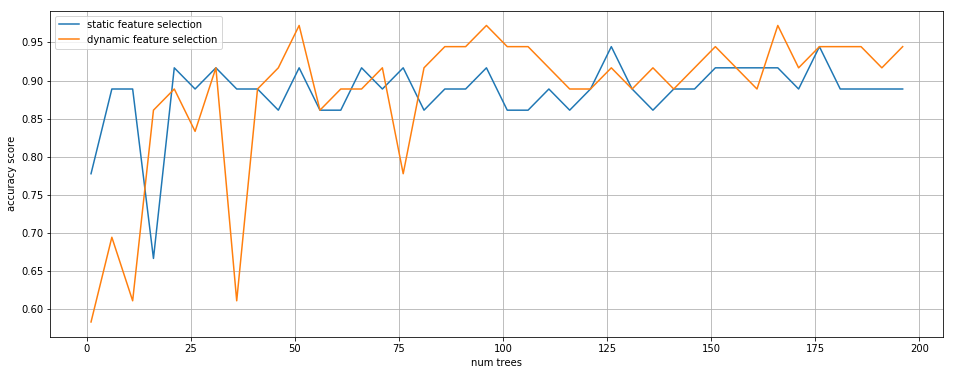

CPU times: user 31.3 s, sys: 0 ns, total: 31.3 s
Wall time: 31.3 s


In [11]:
%%time
numTrees = np.arange(1,200,5)
max_depth = 1
scores_static = []
scores_dynamic = []
for num in numTrees:
    model_d = RandomForest(num_trees=num, max_depth=max_depth, max_features='log2')
    model_s = RandomForest(num_trees=num, max_depth=max_depth, max_features='log2', fixedFeatures=True)
    model_d.fit(X_train, y_train)
    model_s.fit(X_train, y_train)
    scores_static.append(accuracy_score(y_test, model_s.predict(X_test)))
    scores_dynamic.append(accuracy_score(y_test, model_d.predict(X_test)))
plt.figure(figsize=(16,6))
plt.plot(numTrees, scores_static, label='static feature selection')
plt.plot(numTrees, scores_dynamic, label='dynamic feature selection')
plt.xlabel('num trees')
plt.ylabel('accuracy score')
plt.legend()
plt.grid(True)
plt.show()

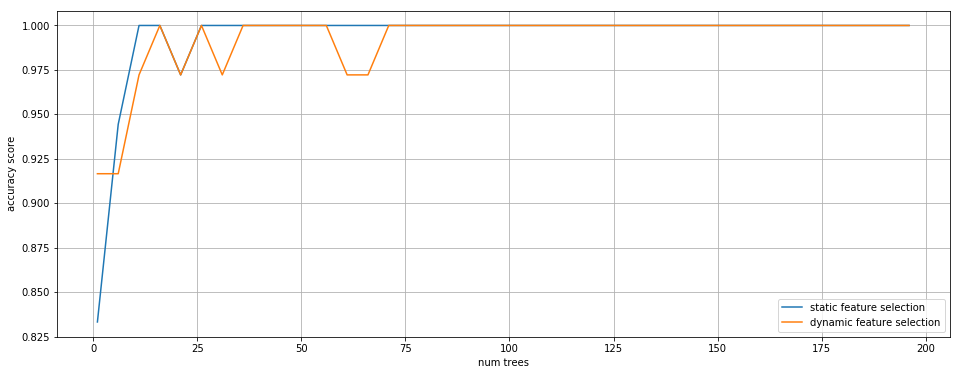

CPU times: user 31.3 s, sys: 0 ns, total: 31.3 s
Wall time: 31.3 s


In [12]:
%%time
numTrees = np.arange(1,200,5)
max_depth = 5
scores_static = []
scores_dynamic = []
for num in numTrees:
    model_d = RandomForest(num_trees=num, max_depth=max_depth, max_features='log2')
    model_s = RandomForest(num_trees=num, max_depth=max_depth, max_features='log2', fixedFeatures=True)
    model_d.fit(X_train, y_train)
    model_s.fit(X_train, y_train)
    scores_static.append(accuracy_score(y_test, model_s.predict(X_test)))
    scores_dynamic.append(accuracy_score(y_test, model_d.predict(X_test)))
plt.figure(figsize=(16,6))
plt.plot(numTrees, scores_static, label='static feature selection')
plt.plot(numTrees, scores_dynamic, label='dynamic feature selection')
plt.xlabel('num trees')
plt.ylabel('accuracy score')
plt.legend()
plt.grid(True)
plt.show()

Статический выбор фичей работает лучше, чем динамический, но не сильно. Есть подозрение, что просто датасет слишком хорошо разбивается.